In [1]:
##########################
##                      ##
## Irving Gomez Mendez  ##
##  November 09, 2021   ##
##                      ##
##########################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from scipy.stats import multivariate_normal
from kneed import KneeLocator
#from sklearn.datasets import make_blobs #
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

<AxesSubplot:xlabel='0', ylabel='1'>

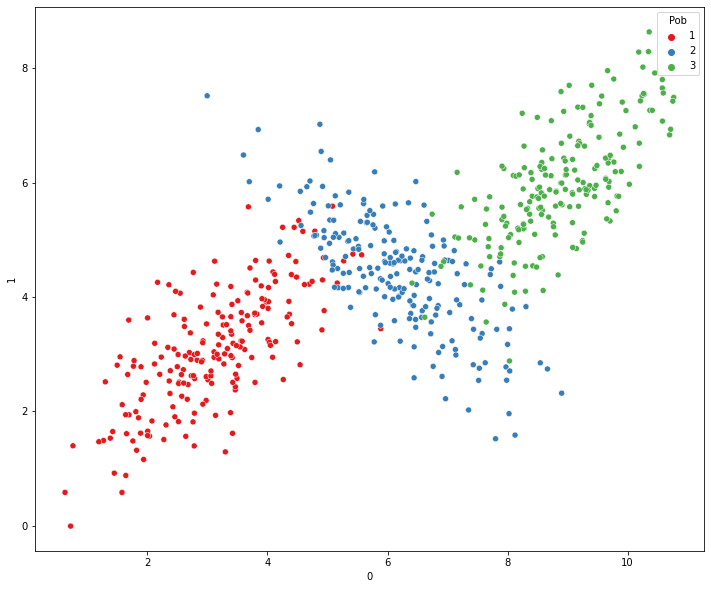

In [2]:
m = 200

mu1, mu2, mu3 = ([3,3], [6,4.5], [9,6])
S1  = [[1, 0.7], [0.7, 1]]
S2  = [[1, -0.7], [-0.7, 1]]
S3  = [[1, 0.7], [0.7, 1]]

np.random.seed(seed = 111)
X1 = multivariate_normal.rvs(mean = mu1, cov = S1, size = m)
X2 = multivariate_normal.rvs(mean = mu2, cov = S2, size = m)
X3 = multivariate_normal.rvs(mean = mu3, cov = S3, size = m)

X1 = pd.DataFrame(X1)
X2 = pd.DataFrame(X2)
X3 = pd.DataFrame(X3)

X1['Pob'] = 1
X2['Pob'] = 2
X3['Pob'] = 3

datos = pd.concat([X1, X2, X3])
X = np.array(datos.drop('Pob', axis=1))

plt.figure(figsize=(12,10))
sns.scatterplot(data=datos, x=0, y=1, hue='Pob', palette='Set1')

In [3]:
hat_pis = [1/3]*3
hat_pis  = np.array(hat_pis).reshape(1,3)

hat_mu1 = [2, 9]
hat_mu2 = [2.5, 9]
hat_mu3 = [3, 9]

hat_S1 = np.eye(2)
hat_S2 = np.eye(2)
hat_S3 = np.eye(2)

histo_mu1 = pd.DataFrame(hat_mu1).T
histo_mu2 = pd.DataFrame(hat_mu2).T
histo_mu3 = pd.DataFrame(hat_mu3).T

histo_mu1['Pob'] = 1
histo_mu2['Pob'] = 2
histo_mu3['Pob'] = 3

histo_mu = pd.concat([histo_mu1, histo_mu2, histo_mu3])
logver = []

delta  = 0.01 # tolerance
iterM  = 1000 # maximum of iterations
tolera = 1 # inicialize tolerance
itera  = 1 # inicialize iteration

while ((tolera > delta) & (itera < iterM)):
    itera = itera + 1

    hat_mu1_old = hat_mu1
    hat_mu2_old = hat_mu2
    hat_mu3_old = hat_mu3

    hat_S1_old = hat_S1
    hat_S2_old = hat_S2
    hat_S3_old = hat_S3

    phi1 = multivariate_normal.pdf(X, mean = hat_mu1, cov = hat_S1)
    phi2 = multivariate_normal.pdf(X, mean = hat_mu2, cov = hat_S2)
    phi3 = multivariate_normal.pdf(X, mean = hat_mu3, cov = hat_S3)

    phis = np.vstack([phi1, phi2, phi3]).T

    num   = (hat_pis * phis)
    denom = num.sum(axis=1).reshape(600,1)
    w     = num / denom

    hat_pis = np.mean(w, axis=0)
    hat_pis = hat_pis.reshape(1,3)

    hat_mu1 = (w[:,0].reshape(600,1) * X).sum(axis=0) / w[:,0].sum()
    hat_mu2 = (w[:,1].reshape(600,1) * X).sum(axis=0) / w[:,1].sum()
    hat_mu3 = (w[:,2].reshape(600,1) * X).sum(axis=0) / w[:,2].sum()

    hat_S1 = (w[:,0].reshape(600,1) * (X-hat_mu1)).T @ (X-hat_mu1) / w[:,0].sum()
    hat_S2 = (w[:,1].reshape(600,1) * (X-hat_mu2)).T @ (X-hat_mu2) / w[:,1].sum()
    hat_S3 = (w[:,2].reshape(600,1) * (X-hat_mu3)).T @ (X-hat_mu3) / w[:,2].sum()

    logver.append(np.log(num.sum(axis=1)).sum())

    histo_mu1 = pd.DataFrame(hat_mu1).T
    histo_mu2 = pd.DataFrame(hat_mu2).T
    histo_mu3 = pd.DataFrame(hat_mu3).T

    histo_mu1['Pob'] = 1
    histo_mu2['Pob'] = 2
    histo_mu3['Pob'] = 3

    histo_mu = pd.concat([histo_mu, histo_mu1, histo_mu2, histo_mu3])

    dif1 = sum((hat_mu1-hat_mu1_old)**2)
    dif2 = sum((hat_mu2-hat_mu2_old)**2)
    dif3 = sum((hat_mu3-hat_mu3_old)**2)
    dif4 = sum(sum((hat_S1-hat_S1_old)**2))
    dif5 = sum(sum((hat_S2-hat_S2_old)**2))
    dif6 = sum(sum((hat_S3-hat_S3_old)**2))

    tolera = dif1 + dif2 + dif3 + dif4 + dif5 + dif6



In [4]:
histo_mu.reset_index(drop=True, inplace=True)
histo_mu

In [5]:
datos.reset_index(drop=True, inplace=True)

In [6]:
datos['Predict_Pob'] = pd.DataFrame(w).idxmax(axis=1) + 1
datos

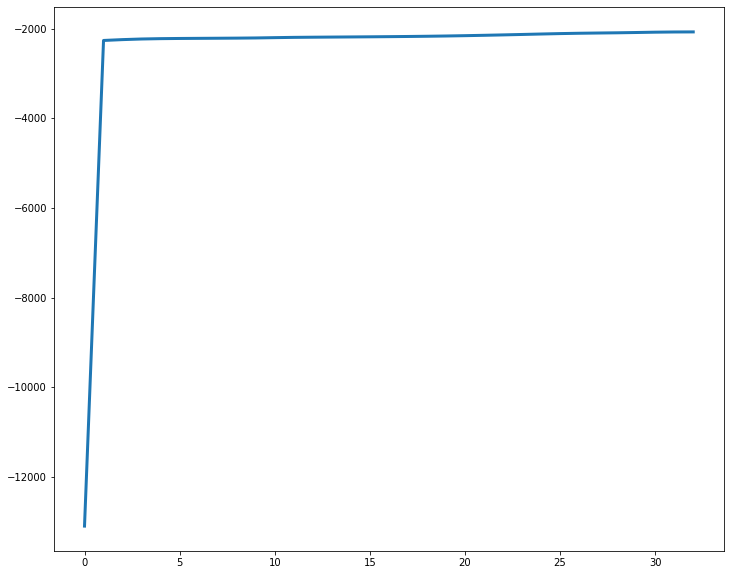

In [7]:
plt.figure(figsize=(12,10))
plt.plot(logver, linewidth=3)
#plt.ylim(-3000, -2000)

(-3000.0, -2000.0)

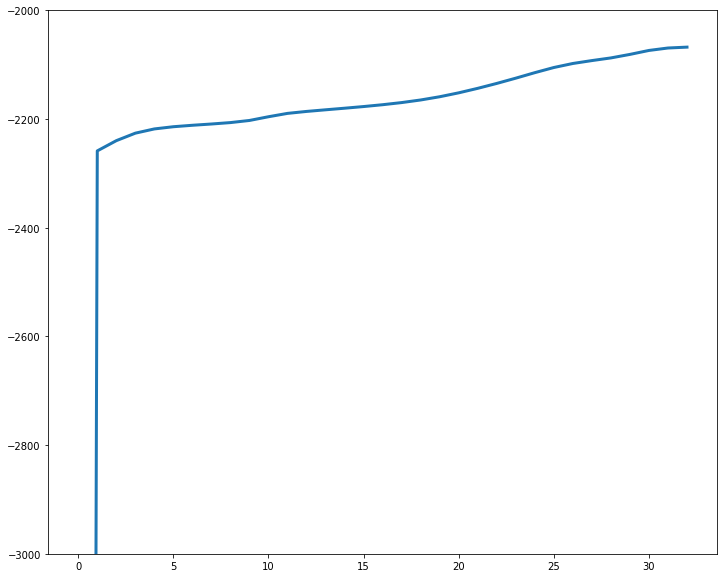

In [15]:
plt.figure(figsize=(12,10))
plt.plot(logver, linewidth=3)
plt.ylim(-3000, -2000)

In [8]:
hat_mu1, hat_mu2, hat_mu3

(array([3.05508187, 3.02575368]),
 array([6.07227716, 4.43566424]),
 array([8.81764504, 5.88574674]))

In [9]:
hat_S1, hat_S2, hat_S3

#mu1, mu2, mu3 = ([3,3], [6,4.5], [9,6])
#S1  = [[1, 0.7], [0.7, 1]]
#S2  = [[1, -0.7], [-0.7, 1]]
#S3  = [[1, 0.7], [0.7, 1]]

(array([[0.95883962, 0.71116973],
        [0.71116973, 1.01396201]]),
 array([[ 1.09001825, -0.77018468],
        [-0.77018468,  1.02682445]]),
 array([[0.87168036, 0.71384782],
        [0.71384782, 1.11029522]]))

<AxesSubplot:xlabel='0', ylabel='1'>

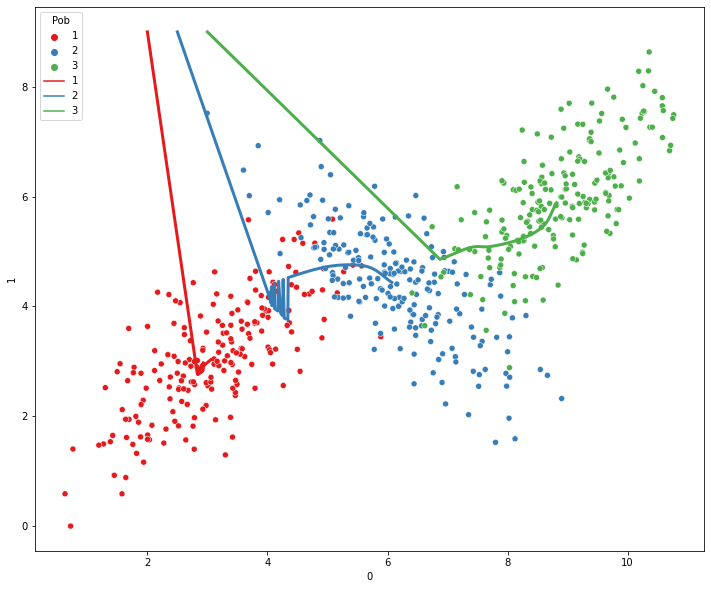

In [10]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=datos, x=0, y=1, hue='Pob', palette='Set1')
sns.lineplot(data=histo_mu, x=0, y=1, hue='Pob', palette='Set1', linewidth=3)

<AxesSubplot:xlabel='0', ylabel='1'>

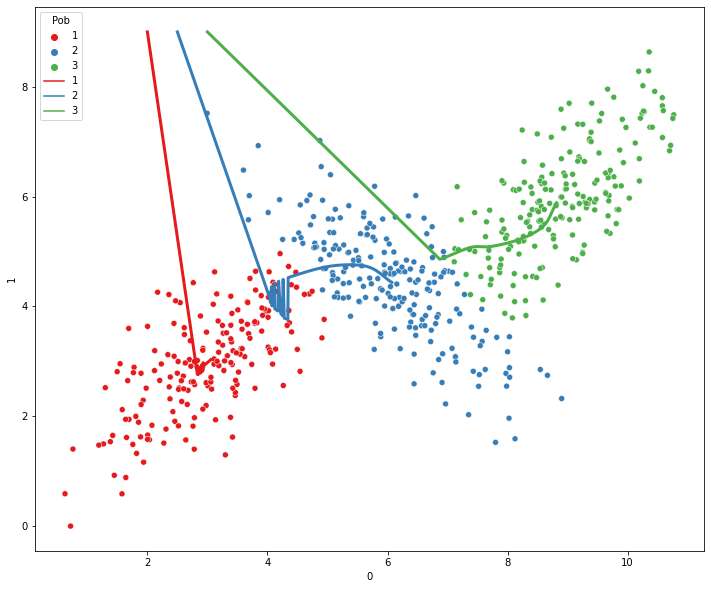

In [11]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=datos, x=0, y=1, hue='Predict_Pob', palette='Set1')
sns.lineplot(data=histo_mu, x=0, y=1, hue='Pob', palette='Set1', linewidth=3)

Text(0, 0.5, 'SSE')

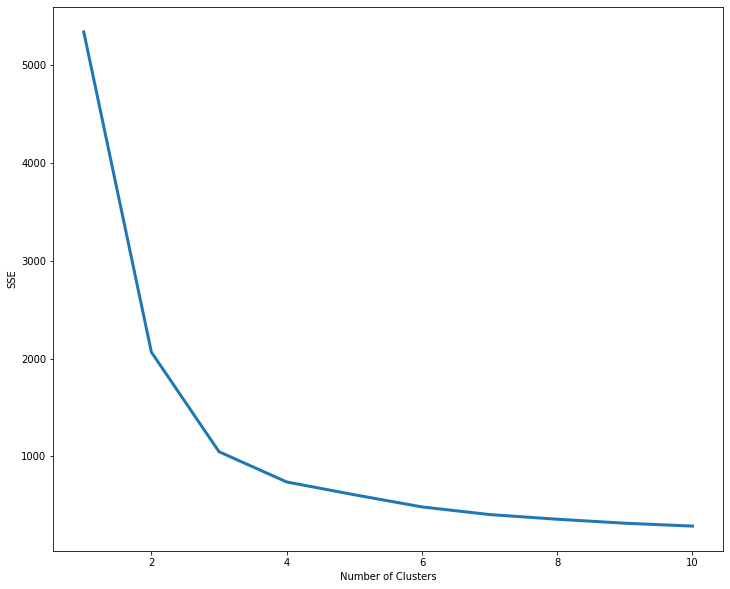

In [12]:
# Using python's libraries
# Taken from realpython and sklearn examples

kmeans = KMeans(n_clusters=3, random_state=111)
kmeans = kmeans.fit(X)

In [ ]:
# The lowest SSE value
kmeans.inertia_

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

In [ ]:
# Predicted labels
kmeans.labels_[:10]

In [ ]:
# Choosing the Appropriate Number of Clusters

# A list holds the SSE values for each k
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=111)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12,10))
plt.plot(range(1, 11), sse, linewidth=3)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

In [13]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

Text(0, 0.5, 'Silhoutte Score')

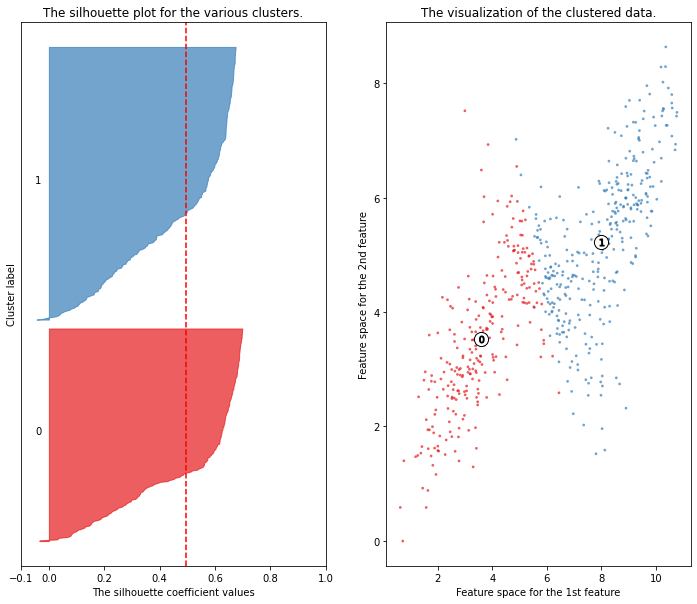

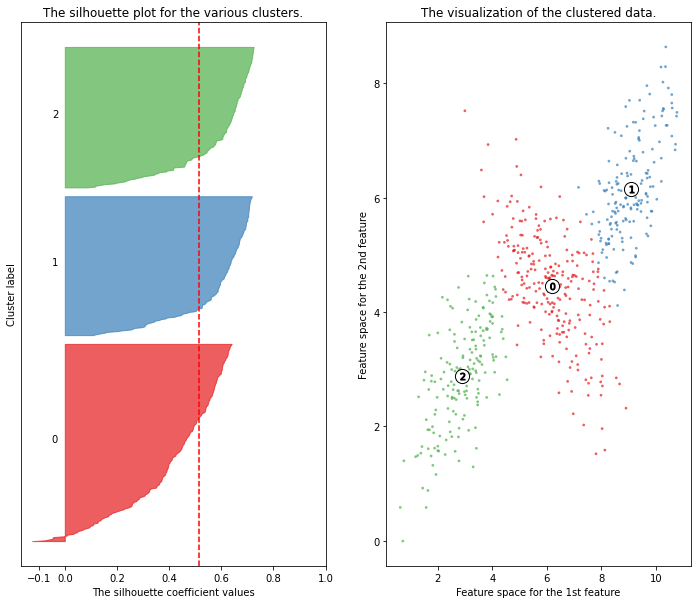

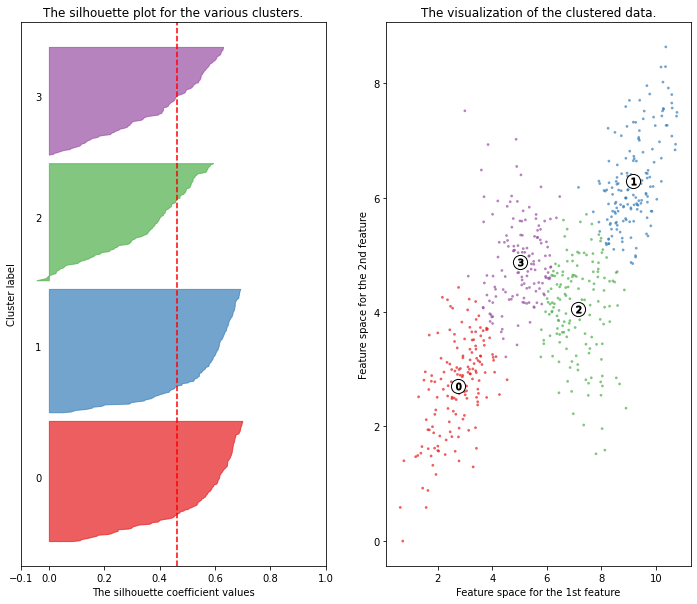

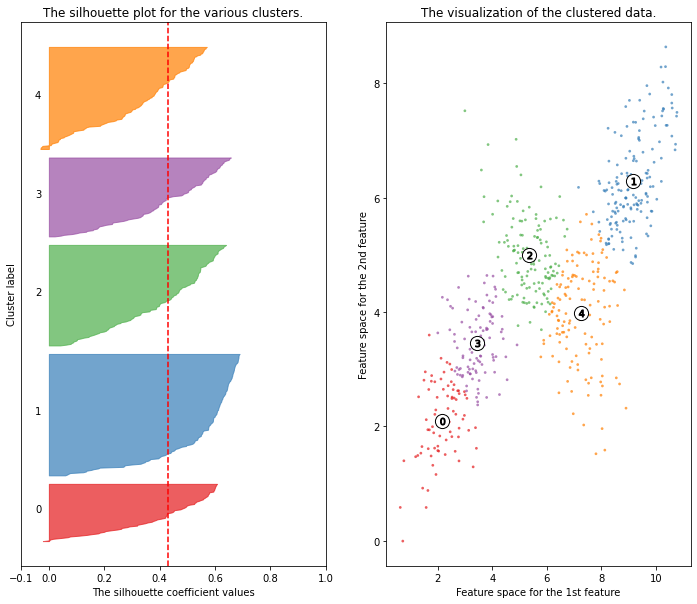

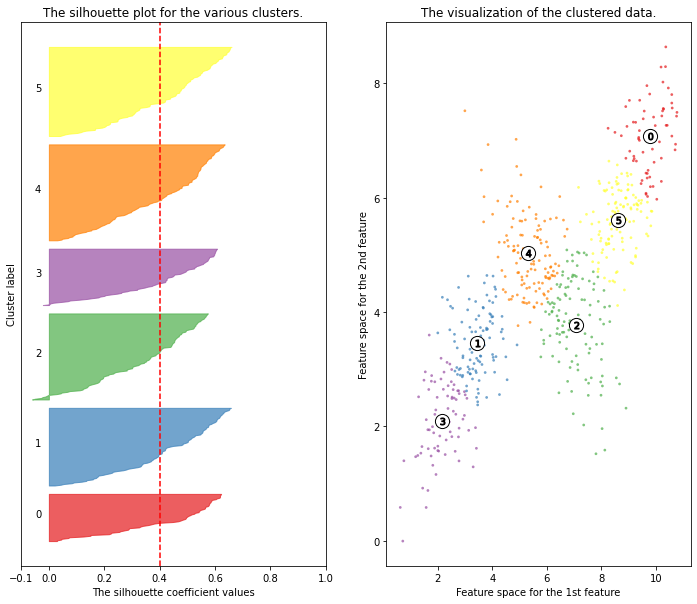

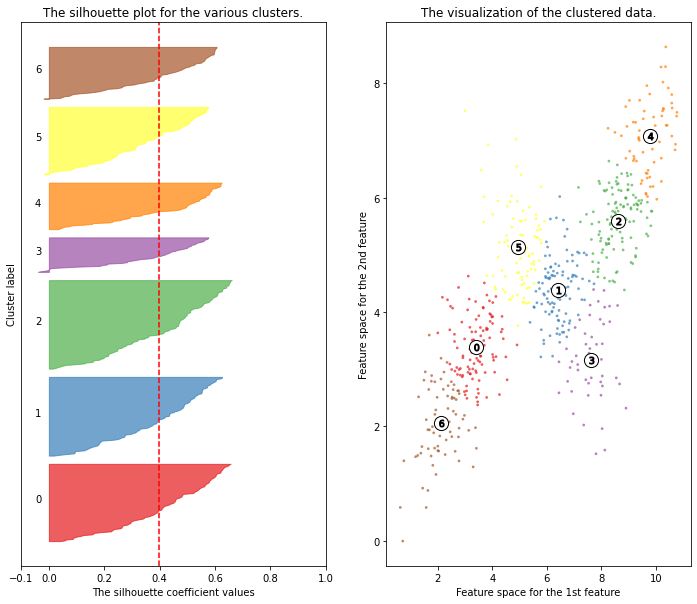

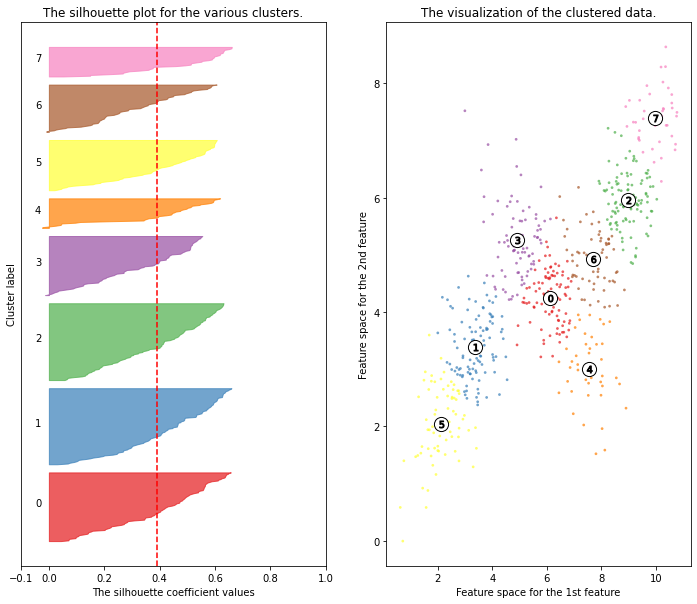

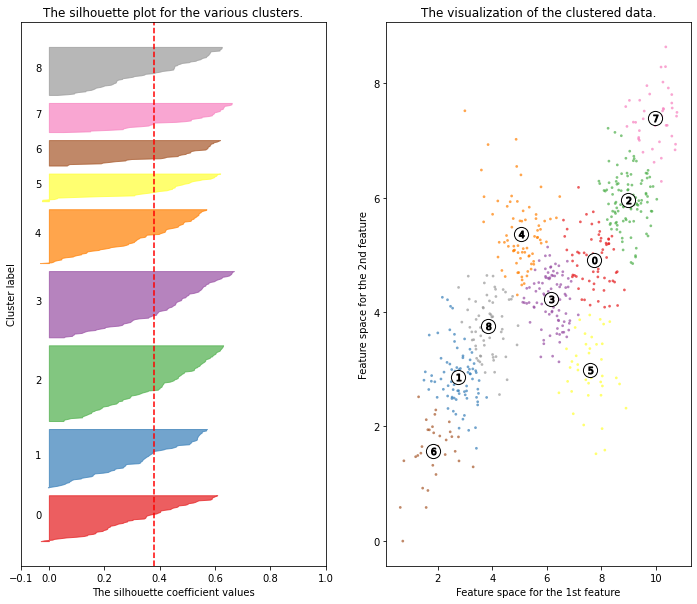

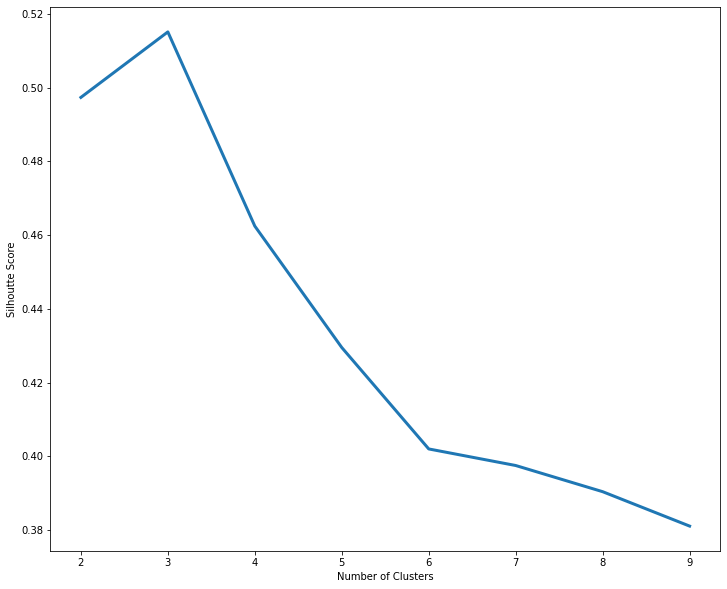

In [14]:
silhouette_avgs = []
for k in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))

    kmeans = KMeans(n_clusters=k, random_state=111)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_avgs.append(silhouette_avg)

     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, kmeans.labels_)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Set1(i)

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Set1(kmeans.labels_)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

plt.figure(figsize=(12,10))
plt.plot(range(2, 10), silhouette_avgs, linewidth=3)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Score")